# **Haberman's Cancer Survival DataSet Analysis**

Objective is to find survival of patients lived more than 5 years (status=1) and  died in less than 5 years (status=2) from operation date

In [90]:
import pandas as p
import seaborn as sb
import matplotlib.pyplot as pt
import numpy as np
#read csv file using Pandas and load as a dataFrame 
#dataframe name is: habermancsv
habermancsv=p.read_csv("haberman.csv")

In [58]:
# Find total number of variables / features
print("Habermancsv Data Frame Variables / Features are : " ,habermancsv.columns[0:3])
print("Total Number of Habermancsv Data Frame Variables / Features are : " ,len(habermancsv.columns[0:3]))


Habermancsv Data Frame Variables / Features are :  Index(['age', 'year', 'nodes'], dtype='object')
Total Number of Habermancsv Data Frame Variables / Features are :  3


In [59]:
#Find total number of classes
print("Habermancsv Data Frame Classes are : " ,habermancsv.columns[3:4])
print("Total Number of Habermancsv Data Frame Classes are : " ,len(habermancsv.columns[3:4]))



Habermancsv Data Frame Classes are :  Index(['status'], dtype='object')
Total Number of Habermancsv Data Frame Classes are :  1


In [60]:
# Find total number of data points
print ("Total Number of Habermancsv Data Points are : ", habermancsv.shape[0])


Total Number of Habermancsv Data Points are :  306


In [69]:
#Find data points per class
habermancsv['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

**Observation:**

1) Habermancsv dataset is a imbalanced dataset as data points for each class is not same (status 1 is 225 and status 2 is 81) nor nearer

## Perform UniVariate Analysis

### Perform UniVariate Analysis through PDF

Find out which variable is very much useful among age, year and nodes to classify class

D:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


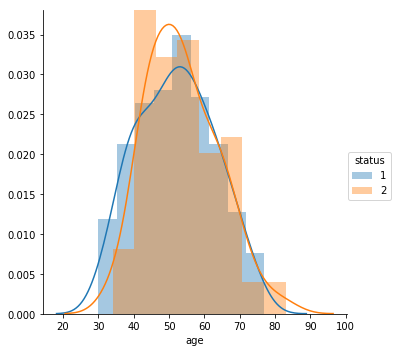

In [81]:
sb.FacetGrid(habermancsv, hue="status", size=5).map(sb.distplot,"age").add_legend()
pt.show()



D:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


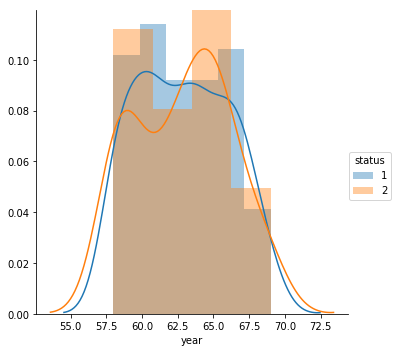

In [83]:
sb.FacetGrid(habermancsv, hue="status", size=5).map(sb.distplot,"year").add_legend()
pt.show()

D:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


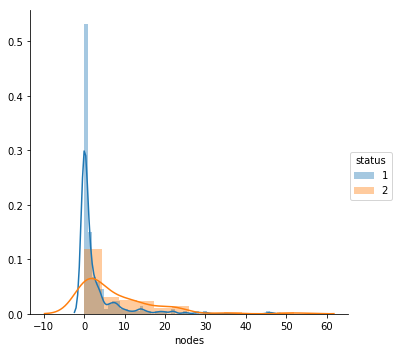

In [80]:
sb.FacetGrid(habermancsv, hue="status", size=5).map(sb.distplot,"nodes").add_legend()
pt.show()


** Observation **

1) observed that nodes variable is better than age 

2) Observed that age variable is better than year

3) As per Nodes PDF, we can say that between 50% to 55% people are survived with the lymph nodes from 0 to 5

However using UniVariate with PDF model cannot able to identify the survivors information exactly as it is more overlapping

### Perform Univariate Analysis with CDF by Age Variable

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


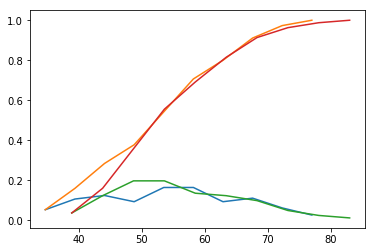

In [101]:
# filter by class

morethanfiveyears=habermancsv.loc[habermancsv["status"]==1]
lessthanfiveyears=habermancsv.loc[habermancsv["status"]==2]

#plots of CDF of age against each class

#Plot of CDF of age against class (status =1) more than five years by age
counts, bin_edges = np.histogram(morethanfiveyears['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)

#Plot of CDF of age against class (status =2) less than five years by age
counts, bin_edges = np.histogram(lessthanfiveyears['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)


### Perform Univariate Analysis with CDF by Year Variable

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


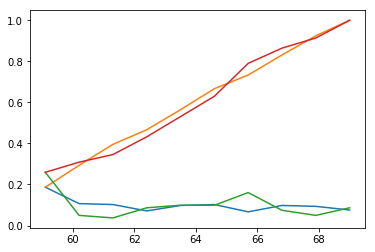

In [98]:

#Plot of CDF of year against class (status =1) more than five years by age
counts, bin_edges = np.histogram(morethanfiveyears['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)

#Plot of CDF of year against class (status =2) less than five years by age
counts, bin_edges = np.histogram(lessthanfiveyears['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)


### Perform Univariate Analysis with CDF by Year Variable

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


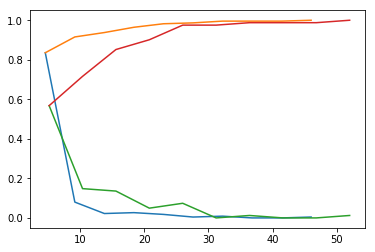

In [102]:

#Plot of CDF of nodes against class (status =1) more than five years by age
counts, bin_edges = np.histogram(morethanfiveyears['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)

#Plot of CDF of nodes against class (status =2) less than five years by age
counts, bin_edges = np.histogram(lessthanfiveyears['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)

*** Observation on CDF Analysis ***

1) As per CDF by age analysis, if age is less than 38 then people can able to survive above 5 years

2) with Nodes, Years variables everthing is overlapping

3) if age is more than 30 then there is chance that person can either survive more than 5 years or less than 5 years

### Perform UniVariate Analysis through BOX PLOT

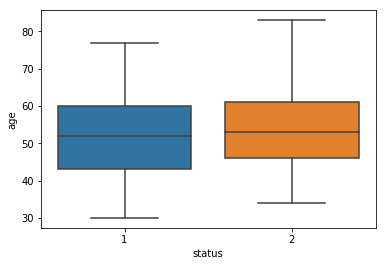

In [105]:
#Box Plot by Age
sb.boxplot(x='status',y='age', data=habermancsv)

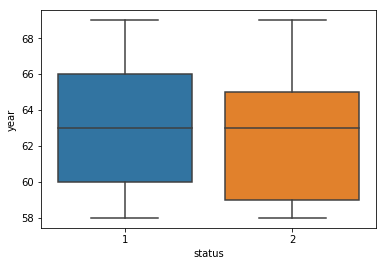

In [106]:
#Box Plot by Year
sb.boxplot(x='status',y='year', data=habermancsv)

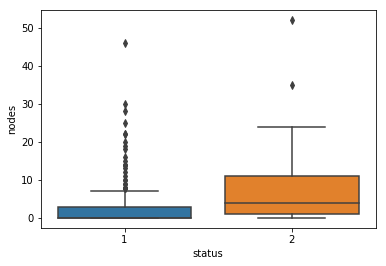

In [109]:
#Box Plot by Nodes
sb.boxplot(x='status',y='nodes', data=habermancsv)

*** Observation on BOX PLOT***

No observations found as everything is overlapping

### Perform UniVariate Analysis through Violin plots

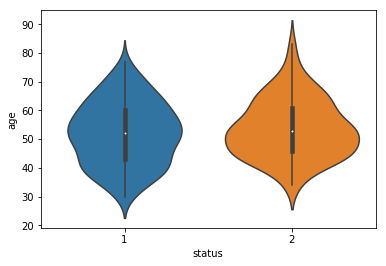

In [116]:
#Violin plot by Age
sb.violinplot(x="status", y="age", data=habermancsv, size=8)
pt.show()

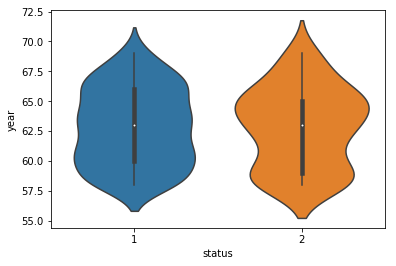

In [117]:
#Violin plot by Year
sb.violinplot(x="status", y="year", data=habermancsv, size=8)
pt.show()

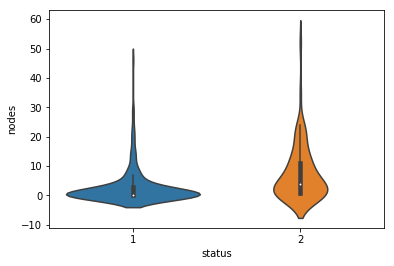

In [119]:
#Violin plot by Nodes
sb.violinplot(x="status", y="nodes", data=habermancsv, size=8)
pt.show()

*** Observation on VIOLIN PLOT***

No observations found as everything is overlapping

# Bi-Variate Analysis

### Bi-Variate Analsysis through 2D Scatter Plot

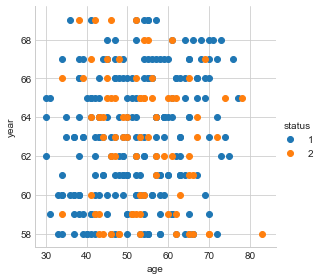

In [124]:
# (age,year)
sb.set_style("whitegrid");
sb.FacetGrid(habermancsv, hue="status", size=4) \
   .map(pt.scatter, "age", "year") \
   .add_legend();
pt.show();

*** Observation: ***

    if age is less than or equal to 34 and year is greater than 57, then the person can survive more than 5 years
    if age is greather than 80 and year is greater than 57 then person cannot survive more than 5 years
    if age is between 34 and 80 then person might survive more than 5 years or cannot survive more than 5 years

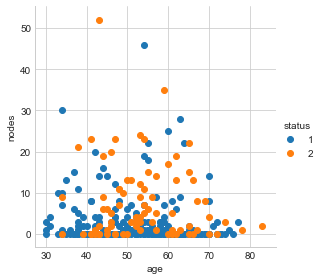

In [126]:
# (age,nodes)
sb.set_style("whitegrid");
sb.FacetGrid(habermancsv, hue="status", size=4) \
   .map(pt.scatter, "age", "nodes") \
   .add_legend();
pt.show();

*** Observation ***

 if lymph nodes is greater than 50 then person cannot survive more than 5 years.
  if age is less than 33 and lymph nodes less than 8 then person can survive more than 5 years

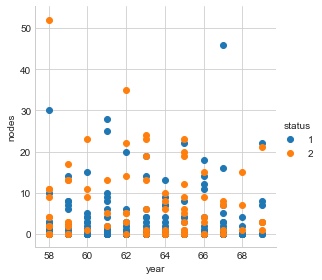

In [128]:
# (year,nodes)
sb.set_style("whitegrid");
sb.FacetGrid(habermancsv, hue="status", size=4) \
   .map(pt.scatter, "year", "nodes") \
   .add_legend();
pt.show();

# Bi-Variate Analsysis through Pair Plot

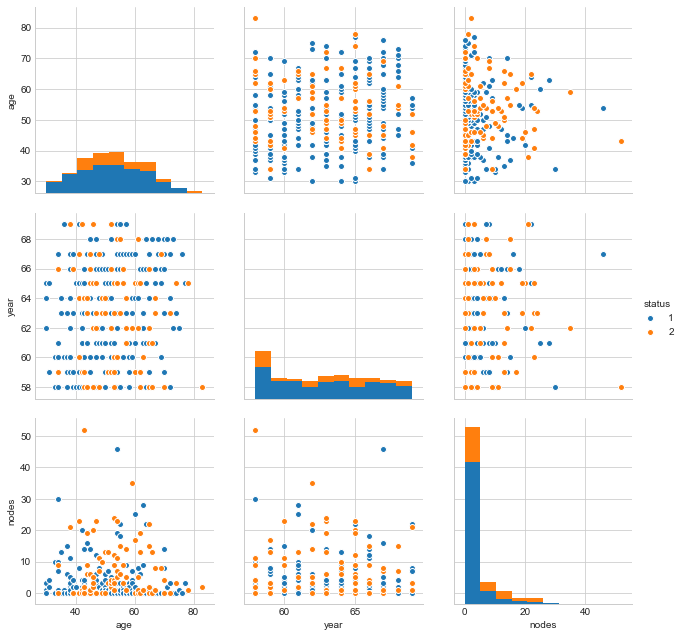

In [135]:
pt.close();
sb.set_style("whitegrid");
sb.pairplot(habermancsv, hue="status", vars=['age','year','nodes'],size=3);
pt.show()

*** Conclusion on Haberman's Survival DataSet are as follows ***

1) Since most of the variables are overlapping, it is not possible to identify 100 percent survival information.

2) However i have observed below points
     - As per Nodes PDF, we can say that between 50% to 55% people are survived with the lymph nodes from 0 to 5
     - As per CDF by age analysis, if age is less than 38 then people can able to survive above 5 years

3) i think there would be another technique to analyze Haberman's DataSet.